In [43]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [44]:
mnist=tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [45]:
for i in range(10):
    print(y_train[i])


5
0
4
1
9
2
1
3
1
4


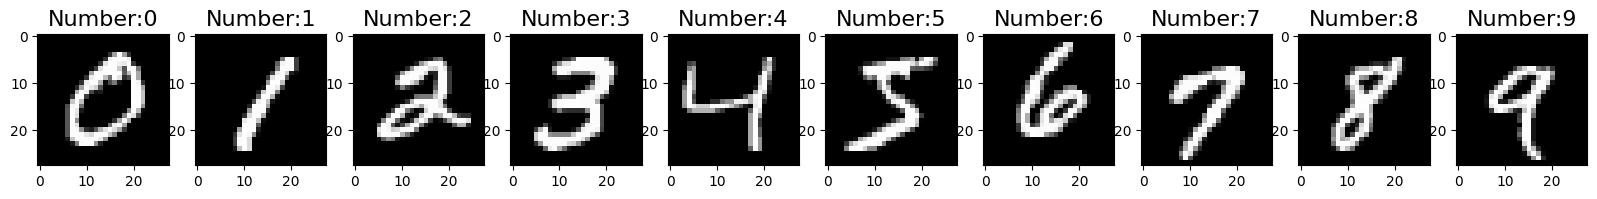

In [46]:
num_classes=10
f,ax=plt.subplots(1,num_classes,figsize=(20,20))
for i in range(0,num_classes):
    sample=x_train[y_train==i][0]
    ax[i].imshow(sample,cmap='gray')
    ax[i].set_title('Number:{}'.format(i),fontsize=16)

In [47]:
len(x_train)
len(x_test)

10000

In [48]:
x_train=x_train/255
x_test=x_test/255


In [49]:
len(x_train)

60000

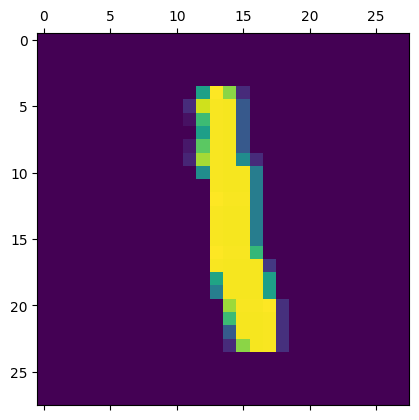

In [50]:
plt.matshow(x_train[6])

In [51]:
model=keras.Sequential([
keras.layers.Flatten(input_shape=(28,28)),
keras.layers.Dense(128,activation='relu'),
keras.layers.Dense(10,activation='softmax')
])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [52]:
model.summary()



Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [53]:
history=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8756 - loss: 0.4360 - val_accuracy: 0.9595 - val_loss: 0.1379
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9655 - loss: 0.1214 - val_accuracy: 0.9719 - val_loss: 0.0921
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9760 - loss: 0.0791 - val_accuracy: 0.9732 - val_loss: 0.0885
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9818 - loss: 0.0578 - val_accuracy: 0.9756 - val_loss: 0.0787
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9869 - loss: 0.0409 - val_accuracy: 0.9770 - val_loss: 0.0768
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9899 - loss: 0.0346 - val_accuracy: 0.9779 - val_loss: 0.0740
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9932 - loss: 0.0240 - val_accuracy: 0.9769 - val_loss: 0.0797
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9944 - loss: 0.0202

In [54]:
test_loss,test_acc=model.evaluate(x_test,y_test)
print('Loss=%.3f' %test_loss)
print('Accuracy=%.3f' %test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9752 - loss: 0.1014
Loss=0.088
Accuracy=0.978


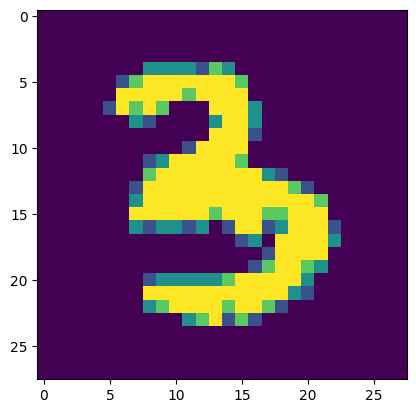

In [55]:
n=random.randint(0,999)
plt.imshow(x_test[n])
plt.show()

In [56]:
predicted_value=model.predict(x_test)
print('handwritten number of image is=%d' %np.argmax(predicted_value[n]))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
handwritten number of image is=3
